In [1]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Country
;'''

cur.execute(query)

In [3]:
countries_data = cur.fetchall()
countries_df = pd.DataFrame(countries_data)
countries_df.columns = [i[0] for i in cur.description]
countries_df.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [4]:
#Is there a statistical difference in the odds of 
#winning a game when a team is playing in front of their home crowd?

In [5]:
#type of test?
#likelihood of random noise?
#how confident are we?

In [6]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM League
;'''

cur.execute(query)

league_data = cur.fetchall()
league_df = pd.DataFrame(league_data)
league_df.columns = [i[0] for i in cur.description]
league_df.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [7]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Match
;'''

cur.execute(query)

match_data = cur.fetchall()
match_df = pd.DataFrame(match_data)
match_df.columns = [i[0] for i in cur.description]

In [8]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to bsa
dtypes: float64(66), int64(9), object(40)
memory usage: 22.8+ MB


In [9]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Player_Attributes
;'''

cur.execute(query)

player_attrib_data = cur.fetchall()
player_attrib_df = pd.DataFrame(player_attrib_data)
player_attrib_df.columns = [i[0] for i in cur.description]
player_attrib_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [10]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Team
;'''

cur.execute(query)

team_data = cur.fetchall()
team_df = pd.DataFrame(team_data)
team_df.columns = [i[0] for i in cur.description]
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [11]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Team_Attributes
;'''

cur.execute(query)

team_attrib_data = cur.fetchall()
team_attrib_df = pd.DataFrame(team_attrib_data)
team_attrib_df.columns = [i[0] for i in cur.description]
team_attrib_df.head()

,id,team_fifa_api_id,team_api_id,date,buildupplayspeed,buildupplayspeedclass,buildupplaydribbling,buildupplaydribblingclass,buildupplaypassing,buildupplaypassingclass,...,chancecreationshooting,chancecreationshootingclass,chancecreationpositioningclass,defencepressure,defencepressureclass,defenceaggression,defenceaggressionclass,defenceteamwidth,defenceteamwidthclass,defencedefenderlineclass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [12]:
player_df = pd.read_csv('player.csv')
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


 ## HYPOTHESIS TEST 3


- There is no statisical difference in the defensive agressiveness between English and Spanish Teams
 
- HA: There is a difference in the defensive aggresiveness between English and Spanish Teams.

### Merging 

In [13]:
match_league_df = match_df.merge(league_df, left_on='league_id', right_on='id')

In [14]:
match_league_df.head()

,id_x,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,vca,gbh,gbd,gba,bsh,bsd,bsa,id_y,country_id_y,name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.5,1.78,3.25,4,1.73,3.4,4.2,1,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,1.85,3.25,3.75,1.91,3.25,3.6,1,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.65,2.5,3.2,2.5,2.3,3.2,2.75,1,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,6.5,1.5,3.75,5.5,1.44,3.75,6.5,1,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.65,4.5,3.5,1.65,4.75,3.3,1.67,1,1,Belgium Jupiler League


In [15]:
match_league_df['name'].value_counts()

Spain LIGA BBVA             3040
France Ligue 1              3040
England Premier League      3040
Italy Serie A               3017
Netherlands Eredivisie      2448
Germany 1. Bundesliga       2448
Portugal Liga ZON Sagres    2052
Poland Ekstraklasa          1920
Scotland Premier League     1824
Belgium Jupiler League      1728
Switzerland Super League    1422
Name: name, dtype: int64

In [42]:
match_league_df[['home_team_goal','away_team_goal','name']].head()

,home_team_goal,away_team_goal,name
0,1,1,Belgium Jupiler League
1,0,0,Belgium Jupiler League
2,0,3,Belgium Jupiler League
3,5,0,Belgium Jupiler League
4,1,3,Belgium Jupiler League


In [45]:
match_league_df['total_goals'] = match_league_df['home_team_goal']+match_league_df['away_team_goal']
match_league_df.groupby('name').mean()

,id_x,country_id_x,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_x1,...,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,id_y,country_id_y,total_goals
name,,,,,,,,,,,,,,,,,,,,,
Belgium Jupiler League,864.5,1.0,1.0,15.770833,1.123332e+06,13810.710648,13810.710648,1.609375,1.192130,1.000000,...,130483.990667,106290.882745,104859.241539,129756.222815,137788.415323,122080.680213,141760.695652,1.0,1.0,2.801505
England Premier League,3248.5,1729.0,1729.0,19.500000,1.178767e+06,9142.275000,9142.275000,1.550987,1.159539,1.000000,...,75268.363666,66452.856061,64026.185625,66883.558262,66856.601187,67075.971966,62341.181549,1729.0,1729.0,2.710526
France Ligue 1,6288.5,4769.0,4769.0,19.500000,1.171642e+06,9808.300000,9808.300000,1.402961,1.040132,1.000000,...,109500.812067,100625.895015,98733.376482,111518.892597,112346.395717,106544.452475,105993.621863,4769.0,4769.0,2.443092
Germany 1. Bundesliga,9032.5,7809.0,7809.0,17.500000,1.189377e+06,9180.250000,9180.250000,1.626634,1.274918,1.000000,...,105494.805237,88790.174642,84651.697627,99426.244881,103387.963205,91402.612587,80182.783729,7809.0,7809.0,2.901552
Italy Serie A,11765.0,10257.0,10257.0,19.441167,1.236752e+06,10345.651641,10346.633079,1.500829,1.116009,1.000331,...,82311.736545,81381.413152,68145.779993,85029.081395,86561.369087,77038.433166,80629.184911,10257.0,10257.0,2.616838
Netherlands Eredivisie,14497.5,13274.0,13274.0,17.500000,1.180382e+06,9181.388889,9181.388889,1.779820,1.301062,0.995988,...,139629.457001,137162.789803,131370.398652,139509.202866,148710.053268,141840.355955,151334.278872,13274.0,13274.0,3.080882
Poland Ekstraklasa,16681.5,15722.0,15722.0,15.500000,1.181840e+06,7886.570312,7886.570312,1.394792,1.030208,1.000000,...,121433.262844,128652.198099,122038.145429,142294.530461,125631.719971,143883.730061,130648.288625,15722.0,15722.0,2.425000
Portugal Liga ZON Sagres,18667.5,17642.0,17642.0,16.096491,1.246115e+06,13952.262671,13952.262671,1.408382,1.126218,0.998973,...,168675.637214,144853.059009,145248.673512,152575.904987,158064.065435,167246.441302,163542.473210,17642.0,17642.0,2.534600
Scotland Premier League,20605.5,19694.0,19694.0,19.500000,1.204328e+06,9130.754386,9130.599781,1.429276,1.204496,1.000000,...,110523.228255,101015.469354,86668.964148,99371.237176,111143.759270,100177.267738,96783.591611,19694.0,19694.0,2.633772


In [47]:
team_attrib_by_league_df.head()

,id,team_fifa_api_id,team_api_id,date,buildupplayspeed,buildupplayspeedclass,buildupplaydribbling,buildupplaydribblingclass,buildupplaypassing,buildupplaypassingclass,...,chancecreationshootingclass,chancecreationpositioningclass,defencepressure,defencepressureclass,defenceaggression,defenceaggressionclass,defenceteamwidth,defenceteamwidthclass,defencedefenderlineclass,name
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,France Ligue 1
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,France Ligue 1
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,France Ligue 1
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,England Premier League
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,England Premier League


In [48]:
team_attrib_by_league = team_attrib_df.join(match_league_df['name'],on='team_api_id', how ='left')
team_attrib_by_league

,id,team_fifa_api_id,team_api_id,date,buildupplayspeed,buildupplayspeedclass,buildupplaydribbling,buildupplaydribblingclass,buildupplaypassing,buildupplaypassingclass,...,chancecreationshootingclass,chancecreationpositioningclass,defencepressure,defencepressureclass,defenceaggression,defenceaggressionclass,defenceteamwidth,defenceteamwidthclass,defencedefenderlineclass,name
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,France Ligue 1
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,France Ligue 1
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,France Ligue 1
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,England Premier League
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,England Premier League
5,6,77,8485,2012-02-22 00:00:00,58,Balanced,NaN,Little,62,Mixed,...,Normal,Organised,40,Medium,40,Press,60,Normal,Cover,England Premier League
6,7,77,8485,2013-09-20 00:00:00,62,Balanced,NaN,Little,45,Mixed,...,Normal,Organised,42,Medium,42,Press,60,Normal,Cover,England Premier League
7,8,77,8485,2014-09-19 00:00:00,58,Balanced,64.0,Normal,62,Mixed,...,Normal,Organised,41,Medium,42,Press,60,Normal,Cover,England Premier League
8,9,77,8485,2015-09-10 00:00:00,59,Balanced,64.0,Normal,53,Mixed,...,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover,England Premier League
9,10,614,8576,2010-02-22 00:00:00,60,Balanced,NaN,Little,40,Mixed,...,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap,England Premier League


In [35]:
defense = team_attrib_by_league_df[['defenceaggression', 'team_api_id', 'name']]
defense['name'].value_counts()

England Premier League      739
France Ligue 1              665
Poland Ekstraklasa           29
Portugal Liga ZON Sagres      8
Belgium Jupiler League        6
Name: name, dtype: int64

### We need to slice our dataframes in order to only have information about certain leagues:

In [28]:
#swiss_d = defense.loc[defense['defenseaggression'], 'name' == 'Switzerland Super League']
swiss_d = defense[defense['name'].str.contains("Switzerland")==True]
belgium_d = defense[defense['name'].str.contains("Belgium")==True]
english_d = defense[defense['name'].str.contains("England")==True]
spanish_d = defense[defense['name'].str.contains("Spain")==True]


#### Create Numpy Arrays of Match/Defense Aggressiveness Data

In [30]:
swiss_d['defenceaggression']
#swiss_array_df = swiss_d['defenceaggression']
#swiss_array = np.array(swiss_array_df)
#swiss_array # This is an array of all of the defensive aggressiveness scores per match in the swiss league 

Series([], Name: defenceaggression, dtype: int64)

In [63]:
belgium_array_df = belgium_d['defenceaggression']
belgium_array = np.array(belgium_array_df)
belgium_array # This is an array of all of the defensive aggressiveness scores per match in the belgium league 

array([50, 50, 50, ..., 58, 58, 58])

In [64]:
english_array_df = english_d['defenceaggression']
english_array = np.array(english_array_df)
english_array

array([40, 40, 40, ..., 48, 48, 48])

In [65]:
spanish_array_df = spanish_d['defenceaggression']
spanish_array = np.array(spanish_array_df)
spanish_array

array([65, 65, 65, ..., 43, 43, 43])

In [66]:
home_means = team_attrib_by_league_home.groupby('name').mean()
away_ = team_attrib_by_league_away.groupby('name').mean()

## Swiss vs Belgium Defensive Agressiveness

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


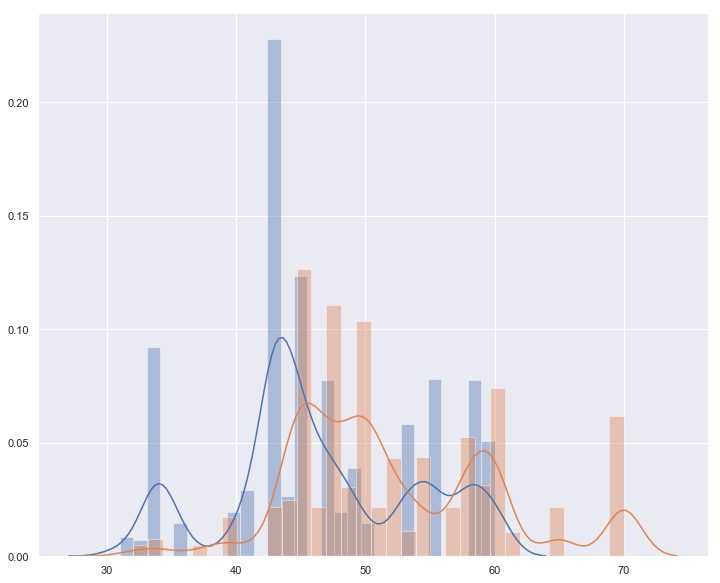

In [38]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(swiss_array) # Blue distribution
sns.distplot(belgium_array) # Green distribution

In [39]:
a = swiss_array.mean()

In [40]:
b = belgium_array.mean()

In [41]:
diff_means = a-b
diff_means

-5.629120869433102

In [43]:
sample_means_swiss = []
for _ in range(50):
    sample_mean = np.random.choice(swiss_array,size=50).mean()
    sample_means_swiss.append(sample_mean)
len(sample_means_swiss)

sample_means_belgium = []
for _ in range(50):
    sample_mean = np.random.choice(belgium_array,size=50).mean()
    sample_means_belgium.append(sample_mean)
len(sample_means_belgium)

50

In [57]:
#sample_means_swiss

In [56]:
#sample_means_belgium

In [47]:
def variance(sample):
    sample_mean = np.mean(sample)
    return sum([(i - sample_mean)**2 for i in sample])

In [48]:
def sample_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = variance(sample1), variance(sample2)
    return (var_1 + var_2)/((n_1 + n_2)-2)

In [49]:
def variance(sample):
    sample_mean = np.mean(sample)
    return sum([(i - sample_mean)**2 for i in sample])

def sample_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var1, var2 = variance(sample1), variance(sample2)
    return (var1 + var2) / ((n_1 + n_2) - 2)

def twosample_tstatistic(expr, ctrl):
    expr_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    n_e, n_c = len(expr), len(ctrl)
    samp_var = sample_variance(expr,ctrl)
    t = (expr_mean - ctrl_mean) / np.sqrt(samp_var * ((1/n_e)+(1/n_c)))
    return t

t_stat = twosample_tstatistic(sample_means_swiss, sample_means_belgium)

t_stat

-28.735745031421086

In [50]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


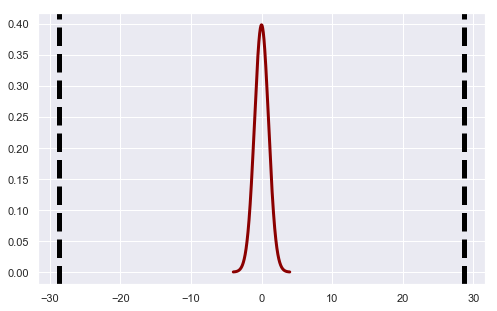

In [52]:
def visualize_t(t_stat, n_control, n_experimental):

    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(t_stat, color='black', linestyle='--', lw=5)
    ax.axvline(-t_stat, color='black', linestyle='--', lw=5)

    plt.show()
    return None

n_control = len(sample_means_swiss)
n_experimental = len(sample_means_belgium)
visualize_t(t_stat, n_control, n_experimental)

In [55]:
stats.ttest_ind(sample_means_swiss, sample_means_belgium)

Ttest_indResult(statistic=-28.735745031421086, pvalue=1.5386087853000813e-49)

## England Vs Spain Defensive Aggressiveness

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


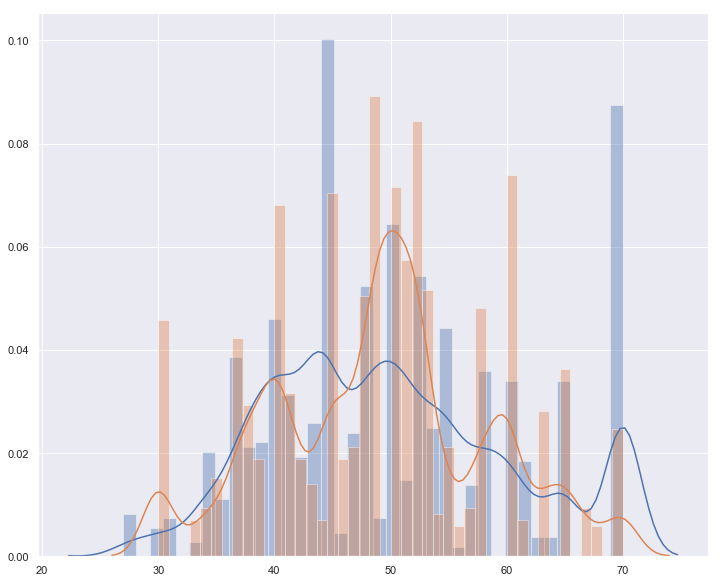

In [71]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(english_array) # Blue distribution
sns.distplot(spanish_array) # Green distribution

In [72]:
sample_means_english = []
for _ in range(50):
    sample_mean = np.random.choice(english_array,size=50).mean()
    sample_means_english.append(sample_mean)
len(sample_means_english)

sample_means_spanish = []
for _ in range(50):
    sample_mean = np.random.choice(spanish_array,size=50).mean()
    sample_means_spanish.append(sample_mean)
len(sample_means_spanish)

50

In [74]:
sample_means_english
sample_means_spanish

[49.0,
 48.94,
 50.62,
 48.54,
 45.02,
 50.42,
 48.62,
 49.14,
 48.64,
 50.16,
 48.3,
 51.8,
 47.86,
 50.52,
 48.72,
 49.1,
 49.58,
 48.4,
 50.18,
 48.86,
 50.02,
 46.7,
 50.66,
 49.76,
 48.54,
 49.84,
 49.62,
 48.1,
 48.18,
 49.76,
 50.54,
 45.66,
 51.26,
 48.6,
 48.8,
 48.52,
 48.94,
 49.08,
 48.08,
 50.64,
 49.0,
 48.68,
 49.32,
 51.16,
 51.12,
 48.0,
 50.18,
 49.66,
 48.42,
 48.9]

In [75]:
t_stat = twosample_tstatistic(sample_means_english, sample_means_spanish)

t_stat

2.5188908490358557

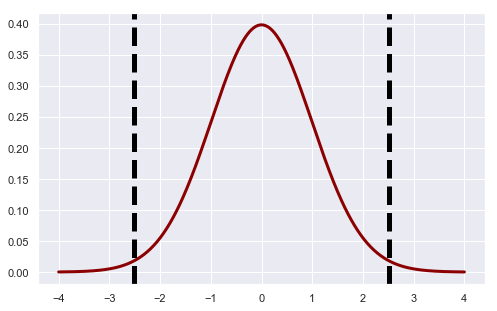

In [76]:
def visualize_t(t_stat, n_control, n_experimental):

    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(t_stat, color='black', linestyle='--', lw=5)
    ax.axvline(-t_stat, color='black', linestyle='--', lw=5)

    plt.show()
    return None

n_control = len(sample_means_english)
n_experimental = len(sample_means_spanish)
visualize_t(t_stat, n_control, n_experimental)

In [77]:
stats.ttest_ind(sample_means_english, sample_means_spanish)

Ttest_indResult(statistic=2.5188908490358553, pvalue=0.013390650158095783)